In [75]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
# plt.style.use('ggplot')
%matplotlib inline

department_data = pd.read_csv('police_department_data.csv')
department_data['crime_date'] = pd.to_datetime(department_data['crime_date'])
department_data['location'] = [eval(location) for location in department_data['location']]

In [70]:
print("Dimension:",department_data.shape)
department_data.head()

Dimension: (150500, 9)


,incident_id,category,crime_description,crime_date,department_district,resolution,address,department_id,location
0,120058272,WEAPON LAWS,POSS OF PROHIBITED WEAPON,2016-01-29 11:00:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,12005827212120,"(37.775420706711, -122.403404791479)"
1,120058272,WEAPON LAWS,"FIREARM, LOADED, IN VEHICLE, POSSESSION OR USE",2016-01-29 11:00:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,12005827212168,"(37.775420706711, -122.403404791479)"
2,141059263,WARRANTS,WARRANT ARREST,2016-04-25 14:59:00,BAYVIEW,"ARREST, BOOKED",KEITH ST / SHAFTER AV,14105926363010,"(37.7299809672996, -122.388856204292)"
3,160013662,NON-CRIMINAL,LOST PROPERTY,2016-01-05 23:50:00,TENDERLOIN,NONE,JONES ST / OFARRELL ST,16001366271000,"(37.7857883766888, -122.412970537591)"
4,160002740,NON-CRIMINAL,LOST PROPERTY,2016-01-01 00:30:00,MISSION,NONE,16TH ST / MISSION ST,16000274071000,"(37.7650501214668, -122.419671780296)"


In [71]:
department_data['category'].unique()

array(['WEAPON LAWS', 'WARRANTS', 'NON-CRIMINAL', 'ASSAULT',
       'OTHER OFFENSES', 'MISSING PERSON', 'LARCENY/THEFT', 'BURGLARY',
       'STOLEN PROPERTY', 'ROBBERY', 'FRAUD', 'DRUG/NARCOTIC',
       'VEHICLE THEFT', 'RECOVERED VEHICLE', 'VANDALISM', 'ARSON',
       'PROSTITUTION', 'SECONDARY CODES', 'SUSPICIOUS OCC', 'DRUNKENNESS',
       'TRESPASS', 'SEX OFFENSES, NON FORCIBLE', 'SEX OFFENSES, FORCIBLE',
       'RUNAWAY', 'KIDNAPPING', 'DISORDERLY CONDUCT',
       'DRIVING UNDER THE INFLUENCE', 'FORGERY/COUNTERFEITING',
       'EMBEZZLEMENT', 'BRIBERY', 'FAMILY OFFENSES', 'GAMBLING',
       'SUICIDE', 'LIQUOR LAWS', 'EXTORTION', 'LOITERING', 'TREA',
       'BAD CHECKS', 'PORNOGRAPHY/OBSCENE MAT'], dtype=object)

## EDA

In [72]:
for feature in department_data.columns:
    print(feature, department_data[feature].isnull().sum())

incident_id 0
category 0
crime_description 0
crime_date 0
department_district 1
resolution 0
address 0
department_id 0
location 0


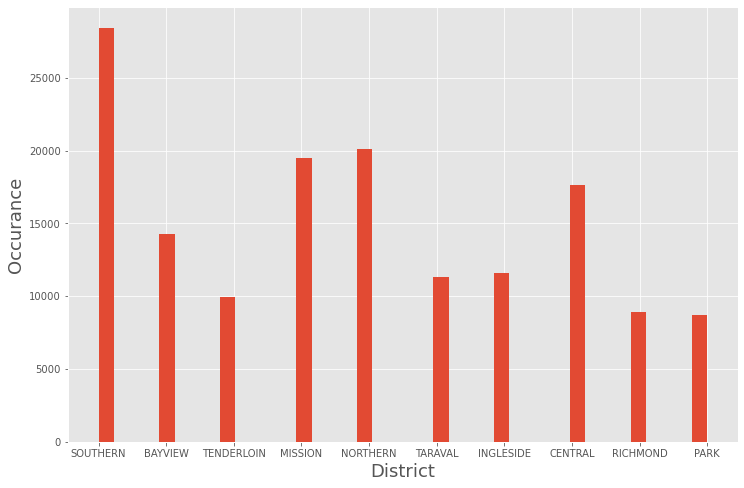

In [76]:
plt.figure(figsize = (12,8))
plt.xlabel('District', fontsize=18)
plt.ylabel('Occurance', fontsize=18)
department_data['department_district'].hist(bins = 40)

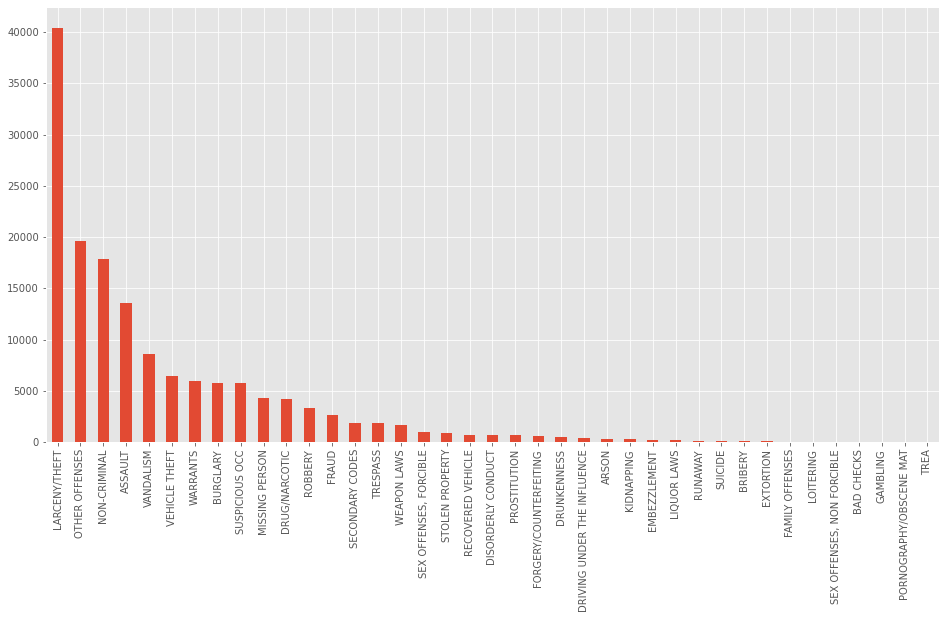

In [77]:
plt.figure(figsize = (16,8))
department_data['category'].value_counts().plot.bar(stacked=True)

In [78]:
department_data['category'].value_counts()

LARCENY/THEFT                  40409
OTHER OFFENSES                 19599
NON-CRIMINAL                   17866
ASSAULT                        13577
VANDALISM                       8589
VEHICLE THEFT                   6419
WARRANTS                        5914
BURGLARY                        5802
SUSPICIOUS OCC                  5782
MISSING PERSON                  4338
DRUG/NARCOTIC                   4243
ROBBERY                         3299
FRAUD                           2635
SECONDARY CODES                 1841
TRESPASS                        1812
WEAPON LAWS                     1658
SEX OFFENSES, FORCIBLE           940
STOLEN PROPERTY                  882
RECOVERED VEHICLE                736
DISORDERLY CONDUCT               658
PROSTITUTION                     641
FORGERY/COUNTERFEITING           619
DRUNKENNESS                      465
DRIVING UNDER THE INFLUENCE      378
ARSON                            286
KIDNAPPING                       257
EMBEZZLEMENT                     168
L

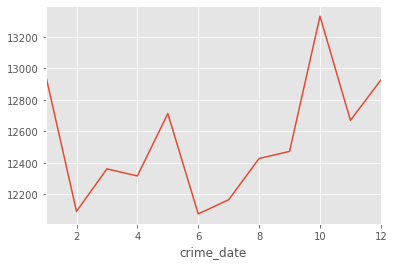

In [79]:
department_data['crime_date'].groupby(department_data.crime_date.dt.month).agg('count').plot.line()

In [80]:
department_data['address'].value_counts()[:15].to_frame('Top Crime locations')

,Top Crime locations
800 Block of BRYANT ST,3561
800 Block of MARKET ST,1405
1000 Block of POTRERO AV,644
900 Block of MARKET ST,547
0 Block of UNITEDNATIONS PZ,452
500 Block of JOHNFKENNEDY DR,448
3200 Block of 20TH AV,431
600 Block of VALENCIA ST,399
100 Block of OFARRELL ST,389
1100 Block of FILLMORE ST,382


In [83]:
department_data['City'] = np.NaN
department_data['State'] = np.NaN
department_data['Country'] = np.NaN
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="myGeolocator")

In [88]:
for item in range(0,len(department_data['location'])):
    location = geolocator.reverse(department_data['location'][item])
    department_data['City'][item],department_data['State'][item],department_data['Country'][item] = location.raw['address']['city'],location.raw['address']['state'],location.raw['address']['country_code']

In [66]:
location.raw['address']

{'house_number': '1247;1249',
 'road': '19th Avenue',
 'neighbourhood': 'Inner Sunset',
 'city': 'San Francisco',
 'county': 'San Francisco City and County',
 'state': 'California',
 'postcode': '94122',
 'country': 'United States of America',
 'country_code': 'us'}